# Spatial Beam Patterns

In this task, you must plot the spatial beam pattern given the channel measurements on the antenna elements. Let the coordinate of the antenna elements i be defined by (xi , yi ), and the
corresponding channel measurement at antenna element i be h_i. 

Therefore, the spatial gain (power) at some point (x, y) on the 2D plane can be given by:

<img src="media/image4.png" alt="drawing" width="600"/> 


where N is the number of antenna elements, and λ is the wavelength of the RF signal.

However, due to the reflective nature of RFID transmissions, the above formula will need to be modified. 

You should write down the modified formula in your report, and explain it. Further, you should complete the code based on the above modified formula, in the function
`spatial_beam_pattern` to return the Power value at some point (x, y) in 2D space. 

This function should take the following inputs:

- The coordinate (x,y).
- The matrix ant enna_pos, where the i t h row represents the tuple (xi , yi ).
- The channel vector h, where hi represents the channel observed at the i t h antenna element.
- λ which is the wavelength of the RF signal

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os


def spatial_beam_pattern(x, y, antenna_pos, h, wavelength):

    power = np.zeros(1)

    accum = np.zeros(1, dtype=complex)

    for i in range(len(h)):
        k = 4*np.pi/wavelength
        dist = np.linalg.norm(antenna_pos[i] - np.array([x, y]))
        accum += np.exp(1j * k * dist - 1j*h[i])

    power = np.abs(accum)**2

    return power

def get_source_channel(antenna_coord, source, wavelength):
    channels = np.zeros(len(antenna_coord))

    k = 4*np.pi/wavelength

    for i in range(len(antenna_coord)):
        distance = np.linalg.norm(antenna_coord[i] - source)

        channels[i] = np.angle(np.exp(1j*k*distance))

    return channels

def make_ant_pos(antenna_spacing, num_ant):
    antenna_coord = np.zeros((num_ant, 2))

    start_cord = 0
    for i in range(num_ant):

        antenna_coord[i,0] = start_cord + i*antenna_spacing
        
    mean_position = np.mean(antenna_coord[:,0])

    antenna_coord[:,0] = antenna_coord[:,0] - mean_position



    return antenna_coord

#### Testing on simulated data 
After completing the function, run the code cell below to test it on simulated data. The outputs should be saved to the `Results` folder and submitted along with your code

In [10]:

# Parameters
lambda_ = 4
antenna_spacing = [lambda_/4, lambda_/2, lambda_]
num_ant = 4

source = [1_000_000, 1_000_000]
x_grid = np.arange(-100, 101)
x_grid = np.linspace(-1_000_000, 1_000_000, 201)
y_grid = np.flip(np.arange(0, 201))
y_grid = np.flip(np.linspace(0, 1_000_000, 201))

# Loop through antenna spacings
for l in range(3):
    antenna_coord = make_ant_pos(antenna_spacing[l], num_ant)
    
    channels = get_source_channel(antenna_coord, source, lambda_)
    matrix = np.zeros((len(x_grid), len(y_grid)))

    for j in range(len(x_grid)):
        for k in range(len(y_grid)):

            matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, lambda_)
    matrix = np.transpose(matrix)

    plt.figure()
    plt.imshow(matrix, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()], cmap='gray', aspect='auto')
    plt.colorbar()
    plt.ylabel('Y Axis', fontsize=16)
    plt.xlabel('X Axis', fontsize=16)
    plt.title(f'Test Case Spatial Beam Pattern with Antenna Spacing {antenna_spacing[l]}', fontsize=20)

    plt.savefig(f'Results/Result_test_spatial_beam{antenna_spacing[l]}.png', format='png')
    plt.close()


C:\Users\mario\AppData\Local\Temp\ipykernel_25036\1912796344.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, lambda_)


#### Testing on Data from RFID Hardware

Below you will find the paramters of the channel values and positions of three antenna elements. 
- Plot the spatial beam pattern considering only antenna 1 and 2
- Plot the spatial beam pattern considering only antenna 1 and 3

In [11]:
# Values of h1, h2 and h3 provided here
h1 = 66.2000  # In degrees
h2 = 109.6875  # In degrees
h3 = 164.4250  # In degrees


# Convert to radians
h1 = np.pi * h1 / 180
h2 = np.pi * h2 / 180
h3 = np.pi * h3 / 180

# Coordinates of Antenna Elements in 2D plane provided here
# Assume ant 1 is at origin and all other antennas lie on x axis
d = 7.62e-2
ant1 = np.array([0, 0])
ant2 = np.array([-d, 0])
ant3 = np.array([-2 * d, 0])

# Frequency and Lambda provided here
freq = 9.0275e8
wavelength = 3e8 / freq



C:\Users\mario\AppData\Local\Temp\ipykernel_25036\3756328059.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, wavelength)
C:\Users\mario\AppData\Local\Temp\ipykernel_25036\3756328059.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, wavelength)


Text(0.5, 1.0, 'Case Spatial Beam Pattern with Antenna 1 and Antenna 3')

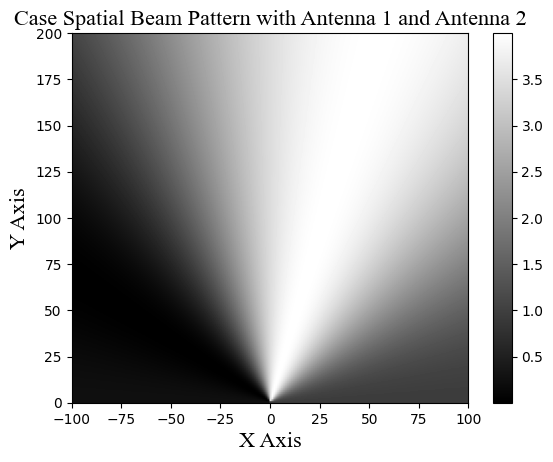

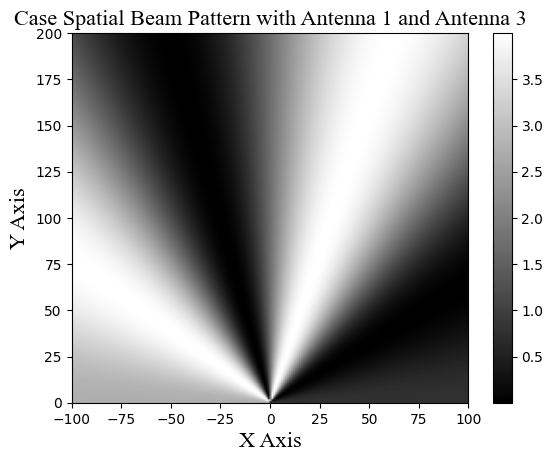

In [12]:


# Antenna 1 and Antenna 2


x_grid = np.arange(-100, 101)
y_grid = np.flip(np.arange(0, 201))

matrix = np.zeros((len(x_grid), len(y_grid)))

for j in range(len(x_grid)):
    for k in range(len(y_grid)):
        antenna_coord = [ant1, ant2]
        channels = [h1, h2]
        matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, wavelength)
matrix = np.transpose(matrix)

plt.figure()
plt.imshow(matrix, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()], cmap='gray', aspect='auto')
plt.colorbar()
plt.ylabel('Y Axis', fontsize=16, fontname='Times New Roman')
plt.xlabel('X Axis', fontsize=16, fontname='Times New Roman')
plt.title('Case Spatial Beam Pattern with Antenna 1 and Antenna 2', fontsize=16, fontname='Times New Roman')



# Antenna 1 and Antenna 3
matrix = np.zeros((len(x_grid), len(y_grid)))

for j in range(len(x_grid)):
    for k in range(len(y_grid)):
        antenna_coord = [ant1, ant3]
        channels = [h1, h3]
        matrix[j, k] = spatial_beam_pattern(x_grid[j], y_grid[k], antenna_coord, channels, wavelength)
matrix = np.transpose(matrix)

plt.figure()
plt.imshow(matrix, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()], cmap='gray', aspect='auto')
plt.colorbar()
plt.ylabel('Y Axis', fontsize=16, fontname='Times New Roman')
plt.xlabel('X Axis', fontsize=16, fontname='Times New Roman')
plt.title('Case Spatial Beam Pattern with Antenna 1 and Antenna 3', fontsize=16, fontname='Times New Roman')
